In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.3)


In [7]:
data_dir=os.path.join(r'C:\Users\Shubham\disdrivdet\train')

In [8]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [9]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     subset='training',class_mode='categorical'
                                                     )

Found 15702 images belonging to 10 classes.


In [10]:
validation_data_gen =image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   subset='validation',class_mode='categorical'
                                                     )

Found 6722 images belonging to 10 classes.


In [11]:
names=np.array(['safe driving','texting - right','talking on the phone - right','texting - left','talking on the phone - left',
               'operating the radio','drinking','reaching behind','hair and makeup','talking to passenger'])

In [12]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(30):
      ax = plt.subplot(6,5,n+1)
      #plt.subplots_adjust(wspace=8.0,hspace=2.0)
      plt.imshow(image_batch[n])
      plt.title(names[label_batch[n]==1][0].title())
      plt.axis('off')

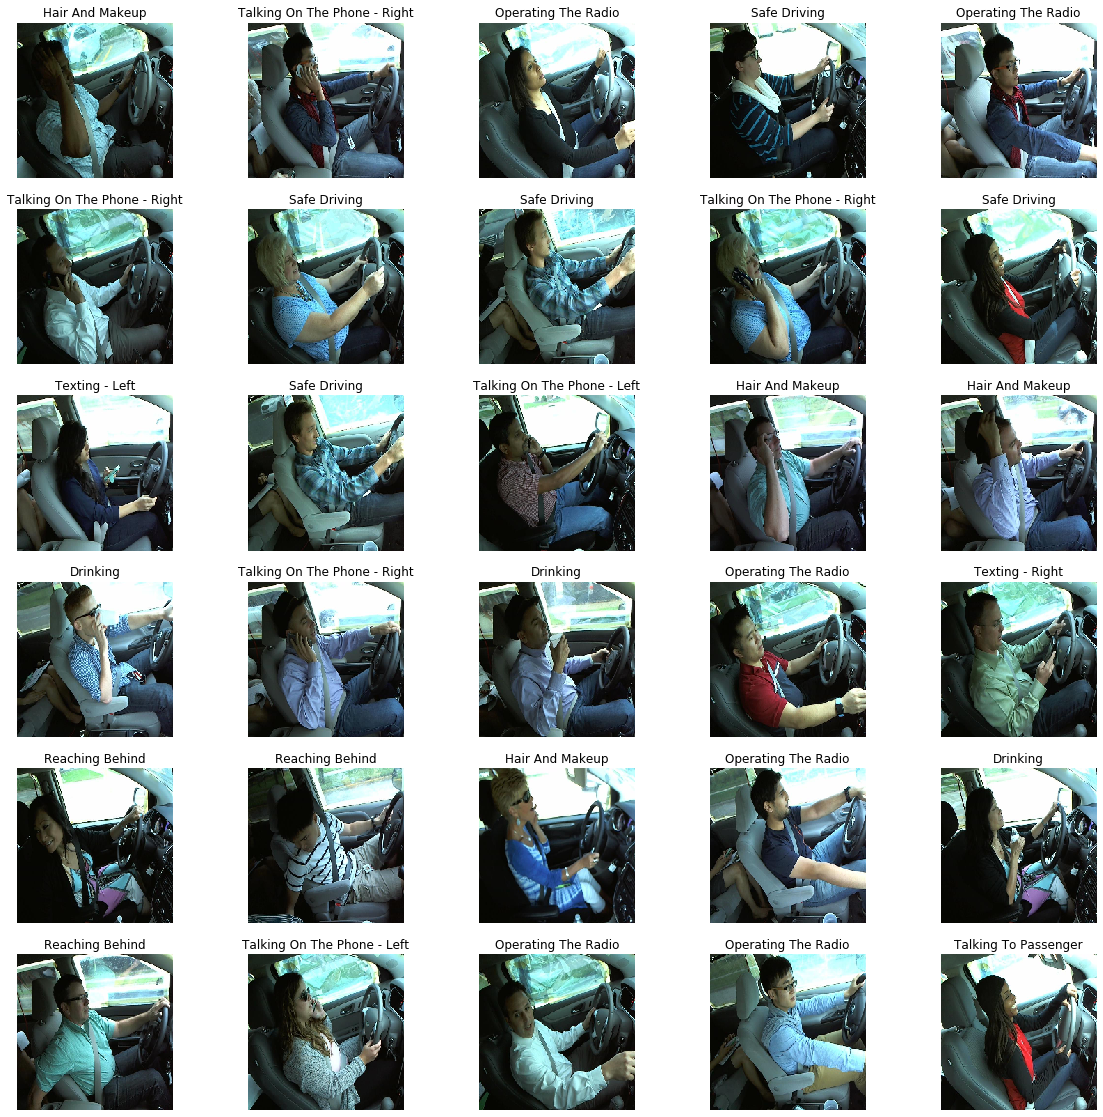

In [13]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
            
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history=model.fit_generator(
            train_data_gen,
            steps_per_epoch=8,
            epochs=30,
            validation_data=validation_data_gen,
            validation_steps=8,verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/30
8/8 - 27s - loss: 2.3373 - accuracy: 0.1055 - val_loss: 2.2968 - val_accuracy: 0.1625
Epoch 2/30
8/8 - 40s - loss: 2.2893 - accuracy: 0.1328 - val_loss: 2.3054 - val_accuracy: 0.1500
Epoch 3/30
8/8 - 50s - loss: 2.2905 - accuracy: 0.1367 - val_loss: 2.3023 - val_accuracy: 0.1375
Epoch 4/30
8/8 - 39s - loss: 2.2721 - accuracy: 0.1250 - val_loss: 2.2663 - val_accuracy: 0.2000
Epoch 5/30
8/8 - 26s - loss: 2.2195 - accuracy: 0.2109 - val_loss: 2.2183 - val_accuracy: 0.2000
Epoch 6/30
8/8 - 37s - loss: 2.1062 - accuracy: 0.2852 - val_loss: 1.9355 - val_accuracy: 0.3750
Epoch 7/30
8/8 - 50s - loss: 1.8347 - accuracy: 0.3477 - val_loss: 1.6831 - val_accuracy: 0.3750
Epoch 8/30
8/8 - 33s - loss: 1.4983 - accuracy: 0.4844 - val_loss: 1.2431 - val_accuracy: 0.5875
Epoch 9/30
8/8 - 44s - loss: 1.3500 - accuracy: 0.5391 - v

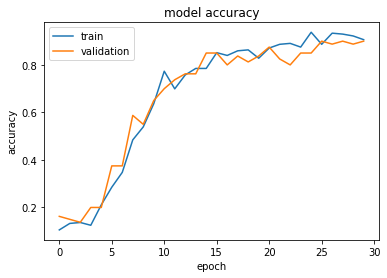

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

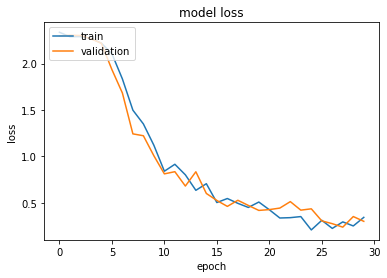

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
model.save('distracted.h5')

In [24]:
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.image as mpimg

Using TensorFlow backend.


[6]


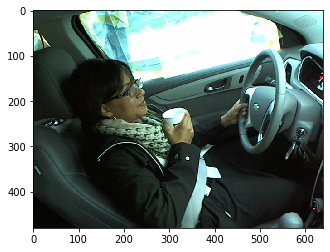

not safe driving


In [32]:
img_width, img_height = 224, 224
model= tf.keras.models.load_model('distracted.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# predicting images
img = image.load_img('img_42.jpg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print(classes)
im = mpimg.imread("img_42.jpg")
plt.imshow(im)
plt.show()

for i in classes:
    if i==[0]:
        print("safe driving")
    else:
        print("not safe driving")
